# Feature Engineering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Feature Selection based on Variance

Features having constant or very similar values don't really play any significant role in machine learning. Thus, feature that are very similar should be removed frim the dataset. We can remove features based on a variance threshold. 

In [4]:
wine_data = pd.read_csv(r"C:\Users\luyil\Downloads\archive (1)\WineQT.csv")
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
features = wine_data.drop(["quality"],axis=1)
labels = wine_data.filter(["quality"],axis=1)

In [6]:
# show variance
features.var()

fixed acidity                3.054088
volatile acidity             0.032268
citric acid                  0.038685
residual sugar               1.838512
chlorides                    0.002234
free sulfur dioxide        105.072466
total sulfur dioxide      1074.668067
density                      0.000004
pH                           0.024544
sulphates                    0.029036
alcohol                      1.171147
Id                      215293.323930
dtype: float64

In [8]:
# filtering features based on threshold
from sklearn.feature_selection import VarianceThreshold

var_sel = VarianceThreshold(threshold=(0.1))
var_sel.fit(features)

VarianceThreshold(threshold=0.1)

In [9]:
attr_to_retain = features.columns[var_sel.get_support()]
attr_to_retain

Index(['fixed acidity', 'residual sugar', 'free sulfur dioxide',
       'total sulfur dioxide', 'alcohol', 'Id'],
      dtype='object')

In [10]:
attr_to_filter = [attr for attr in features.columns if attr not in attr_to_retain]
attr_to_filter

['volatile acidity', 'citric acid', 'chlorides', 'density', 'pH', 'sulphates']

In [11]:
filtered_dataset = features.drop(attr_to_filter,axis=1)
filtered_dataset.head()

,fixed acidity,residual sugar,free sulfur dioxide,total sulfur dioxide,alcohol,Id
0,7.4,1.9,11.0,34.0,9.4,0
1,7.8,2.6,25.0,67.0,9.8,1
2,7.8,2.3,15.0,54.0,9.8,2
3,11.2,1.9,17.0,60.0,9.8,3
4,7.4,1.9,11.0,34.0,9.4,4


## Feature Selection based on Correlation

1. Mutual correlation btw all the features is calculated
2. The correlation threshold is set
3. Features having mutual correlation greater than the correlation threshold with any other features are removed from the dataset.  

In [12]:
correlation_mat = features.corr()
correlation_mat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.088099
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,0.095268
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,-0.103954


<Axes: >

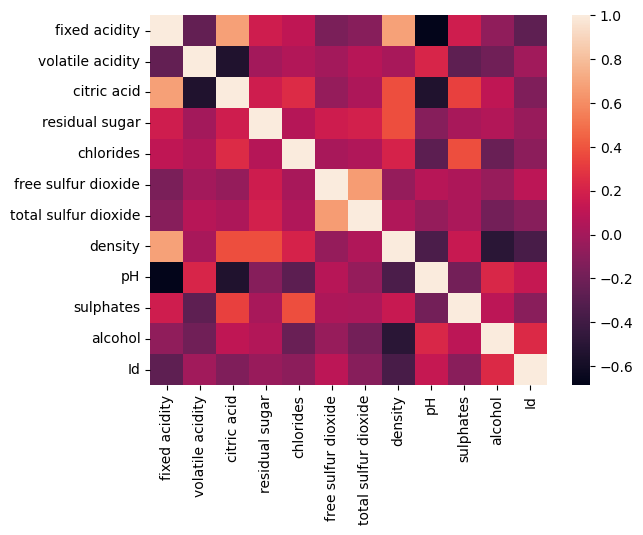

In [14]:
sns.heatmap(correlation_mat)

In [15]:
correlated_features_mat = set()
for i in range(len(correlation_mat.columns)):
    for j in range(i):
        if abs(correlation_mat.iloc[i,j])>0.6:
            corr_col = correlation_mat.columns[i]
            correlated_features_mat.add(corr_col)

In [16]:
len(correlated_features_mat)

4

In [17]:
correlated_features_mat

{'citric acid', 'density', 'pH', 'total sulfur dioxide'}

In [18]:
filter_dataset_corr = features.drop(correlated_features_mat,axis=1)
filter_dataset_corr.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,sulphates,alcohol,Id
0,7.4,0.70,1.9,0.076,11.0,0.56,9.4,0
1,7.8,0.88,2.6,0.098,25.0,0.68,9.8,1
2,7.8,0.76,2.3,0.092,15.0,0.65,9.8,2
3,11.2,0.28,1.9,0.075,17.0,0.58,9.8,3
4,7.4,0.70,1.9,0.076,11.0,0.56,9.4,4


## Feature Selection based on Recursive Elimination

In this feature engineering technique, we use recursive feature elimination to measure the predictive power for each feature. We train RFE model iteratively, util we got the minimum features number that we needed. 

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [21]:
lr = LinearRegression()
rfe = RFE(estimator=lr,n_features_to_select=4,step=1)
rfe.fit(features,labels)

RFE(estimator=LinearRegression(), n_features_to_select=4)

In [22]:
rfe.ranking_

array([5, 1, 4, 6, 1, 8, 7, 3, 1, 1, 2, 9])

In [23]:
attr_to_retain = rfe.get_support(1)
attr_to_retain

array([1, 4, 8, 9], dtype=int64)

In [24]:
filtered_dataset_rfe = features[features.columns[attr_to_retain]]
filtered_dataset_rfe.head()

,volatile acidity,chlorides,pH,sulphates
0,0.70,0.076,3.51,0.56
1,0.88,0.098,3.20,0.68
2,0.76,0.092,3.26,0.65
3,0.28,0.075,3.16,0.58
4,0.70,0.076,3.51,0.56


## Feature Selection based on the Model Performance

In this feature engineering technique, we select features based on feature importance, such as the one calculated by feature importance attr or regression coefficient. 

In [25]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

In [27]:
rfr = RandomForestRegressor()
rfr.fit(features,labels)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [29]:
model = SelectFromModel(rfr,prefit=True,threshold='mean')
X_tranformed = model.transform(features)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [30]:
cols = model.get_support(indices=True)

In [32]:
filtered_dataset_sfm = features[features.columns[cols]]
filtered_dataset_sfm.head()

,volatile acidity,sulphates,alcohol
0,0.70,0.56,9.4
1,0.88,0.68,9.8
2,0.76,0.65,9.8
3,0.28,0.58,9.8
4,0.70,0.56,9.4


## Exercises